## Plotting results of Robustness Benchmark
based on [data_analysis.ipynb](https://github.com/bethgelab/robust-detection-benchmark/blob/master/data-analysis/data_analysis.ipynb) from the Robust Detection Benchmark Repo

In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as pjoin
import seaborn as sns
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

import robustness_eval
from robustness_eval import get_results, get_distortions_from_file

## general definitions

In [19]:
result_dir = "../../output/evaluation"
figures_dir = pjoin(result_dir, "plots")

In [10]:
sns.set()
sns.set_style('ticks')
sns.set_context('paper',rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})

In [11]:
# Colour scheme

col_clean = tuple(x/255.0 for x in (50, 65, 75))
col_stylized = tuple(x/255.0 for x in (180, 160, 105))
col_combined = tuple(x/255.0 for x in (165, 30, 55))

In [12]:
# plotting parameters

combined_plot_height = 7.0
combined_plot_width = 6.0

markersize = 16
fontsize = 24
linewidth = 2.5
labelsize = 18
legend_fontsize=18
axis_start = -0.2
axis_end = 5.3


In [13]:
def plot_individual_results(data_A, data_B, data_C, plot_name, metric_name,
                            ylim, legend_loc=1, markersize=12, linewidth=2.0,
                            fontsize=15, legend_fontsize=11.3, labelsize=12.0,
                            data_name_A="feedforward baseline", data_name_B="feedback additive",
                            data_name_C="feedback modulation", color_A=col_clean,
                            color_B = col_stylized, color_C = col_combined):

    fig = plt.figure(figsize = (15.0, 20.0))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

    for i, distortion in enumerate(distortions[0:15]): # only plot first 15 distortions, not the validation distortions
        ax = plt.subplot(5,3,i+1)

        plt.plot(list(range(6)), data_A[i,:] * 100, 's-', zorder=2, color=color_A,
                 label=data_name_A, markersize=markersize, linewidth=linewidth)
        plt.plot(list(range(6)), data_B[i,:] * 100, '^-', zorder=1, color=color_B,
                 label=data_name_B, markersize=markersize, linewidth=linewidth)
        plt.plot(list(range(6)), data_C[i,:] * 100, 'o-', zorder=3, color=color_C,
                 label=data_name_C, markersize=markersize, linewidth=linewidth)


        plt.title(distortion, fontsize=fontsize)    
        if i >= 12: # plot xlabel only in last row
            plt.xlabel('corruption severity', fontsize=fontsize)
        if i % 3 == 0:
            plt.ylabel(metric_name, fontsize=fontsize)
        plt.axis([axis_start, axis_end, ylim[0], ylim[1]])
        if i == 0:
            legend = plt.legend(loc=legend_loc, fontsize=legend_fontsize, frameon=True, edgecolor="black")
            legend.get_frame().set_linewidth(1.0)

        ax.tick_params(axis='both', which='major', labelsize=labelsize)


    sns.despine(trim=True, offset=5)

    plt.show()

    fig.savefig(pjoin(figures_dir, plot_name), bbox_inches='tight')
    

### Pascal VOC

In [14]:
distortions = get_distortions_from_file(pjoin(result_dir, "rob-bm_ff-baseline_results.pkl"))
ff_baseline_results = get_results(pjoin(result_dir, "rob-bm_ff-baseline_results.pkl"), dataset='voc')
fb_add_results = get_results(pjoin(result_dir, "rob-bm_fb-add_results.pkl"), dataset='voc')
fb_mod_results = get_results(pjoin(result_dir, "rob-bm_fb-mod_results.pkl"), dataset='voc')


model: rob-bm_ff-baseline_results.pkl
Mean Performance under Corruption [mPC] in AP50 = 0.591

model: rob-bm_fb-add_results.pkl
Mean Performance under Corruption [mPC] in AP50 = 0.560

model: rob-bm_fb-mod_results.pkl
Mean Performance under Corruption [mPC] in AP50 = 0.571


In [15]:
def set_fontsize_helper(ax, fontsize):
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)

#### Pascal VOC combined=averaged plot

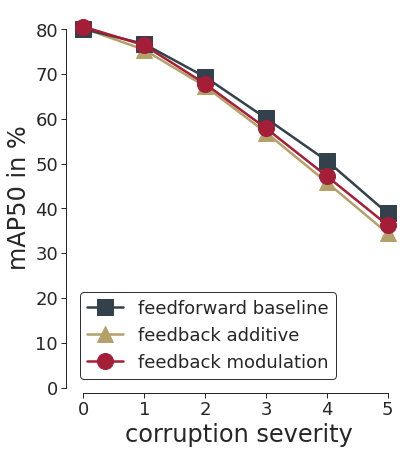

In [16]:
# Number of corruption types
nr_corr = 15 # benchmark
nr_corr = 4  # validation (holdout)

fig = plt.figure(figsize = (combined_plot_width, combined_plot_height))

ax = plt.subplot(1,1,1)
plt.plot(list(range(6)), np.mean(ff_baseline_results[:nr_corr,:], axis=0) * 100,
         's-', zorder=2, color=col_clean, label='feedforward baseline', markersize=markersize,
        linewidth=linewidth)
plt.plot(list(range(6)), np.mean(fb_add_results[:nr_corr,:], axis=0) * 100,
         '^-', zorder=1, color=col_stylized, label='feedback additive', markersize=markersize,
        linewidth=linewidth)
plt.plot(list(range(6)), np.mean(fb_mod_results[:nr_corr,:], axis=0) * 100,
         'o-', zorder=3, color=col_combined, label='feedback modulation', markersize=markersize,
        linewidth=linewidth)

plt.xlabel('corruption severity', fontsize=fontsize)
plt.ylabel('mAP50 in %', fontsize=fontsize)
plt.axis([axis_start, axis_end, 0, 85])
ax.tick_params(axis='both', which='major', labelsize=labelsize)
legend = plt.legend(loc=3, fontsize=legend_fontsize, frameon=True, edgecolor="black")
legend.get_frame().set_linewidth(1.0)

sns.despine(trim=True, offset=5)

plt.show()

fig.savefig(pjoin(figures_dir, 'pascal_corruption_overall.pdf'), bbox_inches='tight')

#### Pascal VOC individual by corruption type

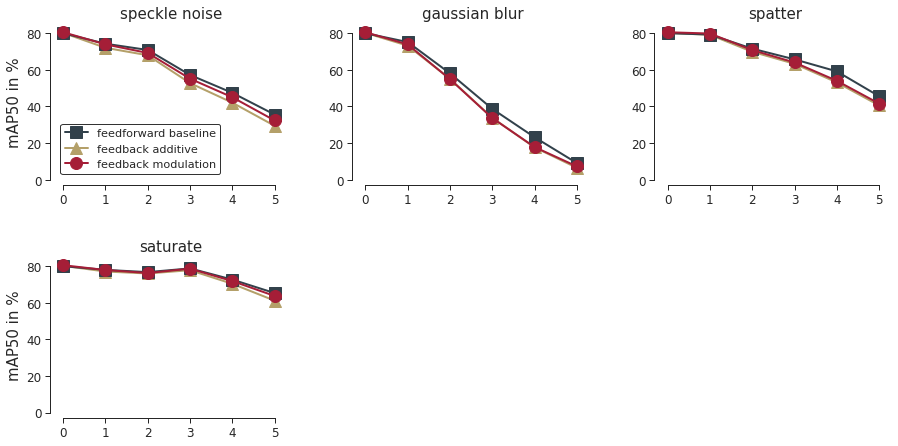

In [17]:
plot_individual_results(data_A = ff_baseline_results,
                        data_B=fb_add_results,
                        data_C=fb_mod_results,
                        plot_name="pascal_corruption_individual.pdf",
                        metric_name="mAP50 in %", ylim=[0, 85], legend_loc=3)